### Machine Learning models implented in this kernel version:

- Cross Validation: Using 11-fold cross-validation
- GridSearchCV for tuning hyperparamters and doing cv
- Models:
    - Ridge
    - Lasso
    - Elastic Net
    - XGBoost
    - Extra tree Regressor
    - Bagging Regressor
    - Support vector Regressor(SVR)
    - Gradient Boositng
    - Light GBM
    - StackingCV Regressor
    - To make final predictions, I blended above models predictions together to get more robust predictions.Blending model using best models.


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
path = "E:/Hackathon/CabFarePrediction/"

In [210]:
train = pd.read_csv(path+'TRAIN.CSV')
test = pd.read_csv(path + 'TEST.CSV')

In [211]:
train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [212]:
test.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,1543364124206,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,1543364124206,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [213]:
train.shape, test.shape

((100000, 9), (25000, 8))

In [214]:
train.describe()

,index,time_stamp,distance,surge_multiplier,fare
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,49999.500000,1.543299e+12,2.188783,1.014945,16.571013
std,28867.657797,4.089871e+07,1.142837,0.095462,9.333901
min,0.000000,1.543204e+12,0.020000,1.000000,2.500000
25%,24999.750000,1.543272e+12,1.280000,1.000000,9.000000
50%,49999.500000,1.543302e+12,2.150000,1.000000,13.500000
75%,74999.250000,1.543333e+12,2.930000,1.000000,22.500000
max,99999.000000,1.543364e+12,7.500000,3.000000,92.000000


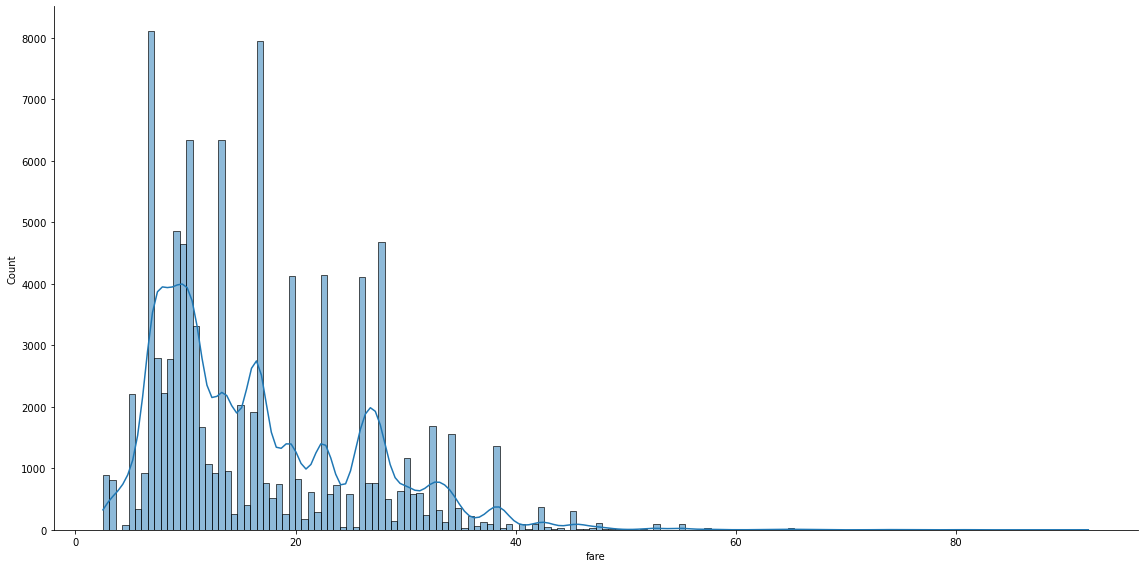

In [215]:
# Fare

sns.displot(x = 'fare', data = train, aspect = 2, height = 8, kde = True);

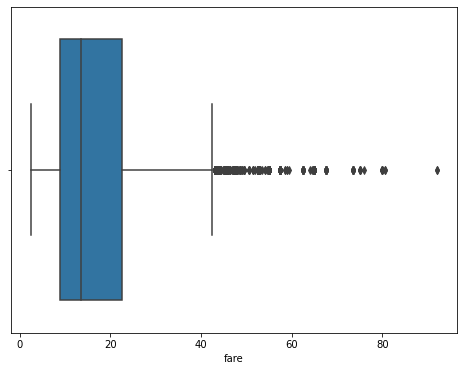

In [216]:
# Boxplot (Fare)

plt.figure(figsize = (8,6))
sns.boxplot(x = 'fare', data = train);

In [217]:
# Skew and kurtosis for SalePrice 
print("Skewness: %f" % train['fare'].skew())
print("Kurtosis: %f" % train['fare'].kurt())

Skewness: 1.039652
Kurtosis: 1.149118


In [218]:
xtrain = train.copy()

In [219]:
# Let's remove outliers

def remove_outliers(dataframe, column):
    q3 = dataframe[column].quantile(0.75)
    q1 = dataframe[column].quantile(0.25)
    
    iqr = q3- q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    
    df_no_outlier = dataframe[(dataframe[column]>lower) & (dataframe[column] < upper)]
    
    return df_no_outlier

In [220]:
xtrain.shape

(100000, 9)

In [221]:
# Removing postitive skewness

xtrain['fare'] = np.log1p(xtrain['fare'])

In [222]:
## REmoving outliers

xtrain = remove_outliers(xtrain, 'fare')

In [223]:
xtrain.shape

(99998, 9)

In [224]:
# Skew and kurtosis for Fare

print("Skewness: %f" % xtrain['fare'].skew())
print("Kurtosis: %f" % xtrain['fare'].kurt())

Skewness: -0.006457
Kurtosis: -0.656464


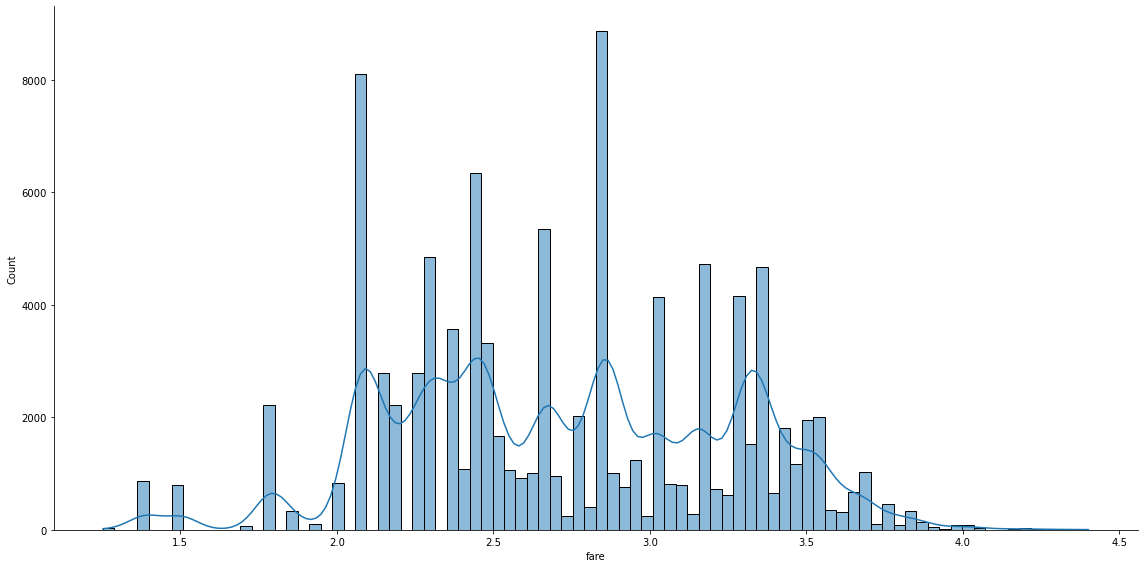

In [225]:
sns.displot(x = 'fare', data = xtrain, aspect = 2, height = 8, kde = True);

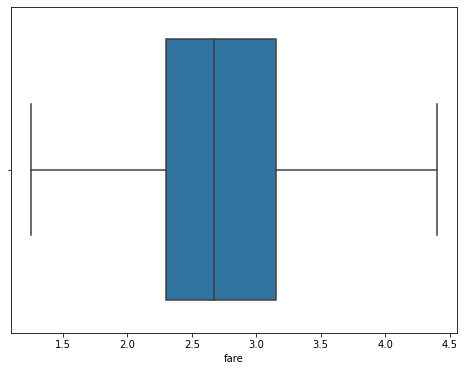

In [226]:
# Boxplot (Fare)

plt.figure(figsize = (8,6))
sns.boxplot(x = 'fare', data = xtrain);

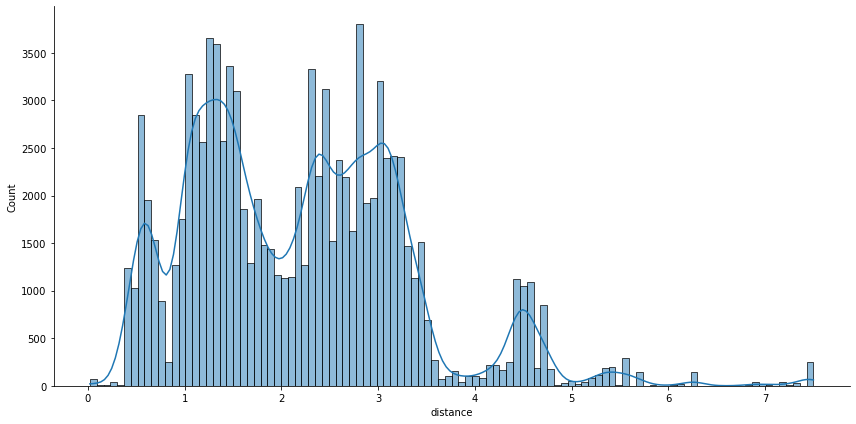

In [227]:
# Distance

sns.displot(x = 'distance', data = train, aspect = 2, height = 6, kde = True);

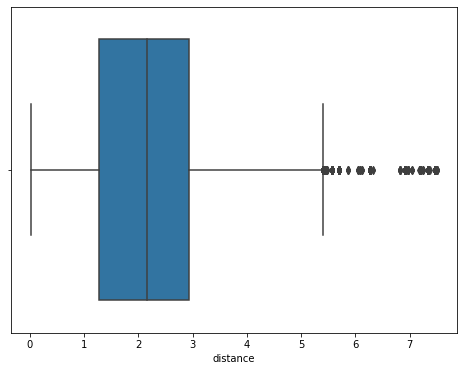

In [228]:
# Boxplot (Distance)

plt.figure(figsize = (8,6))
sns.boxplot(x = 'distance', data = train);

In [229]:
# Applying log transformation

xtrain['distance'] = np.log1p(xtrain['distance'])

In [230]:
## Removing outliers

xtrain = remove_outliers(xtrain, 'distance')

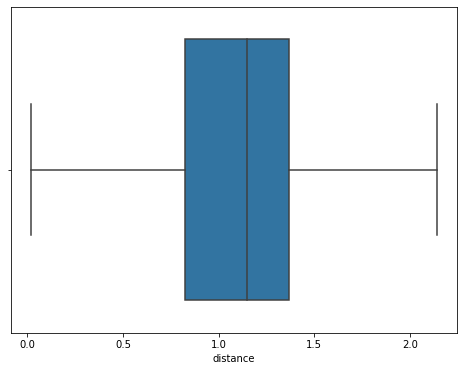

In [231]:
# Boxplot (Distance)

plt.figure(figsize = (8,6))
sns.boxplot(x = 'distance', data = xtrain);

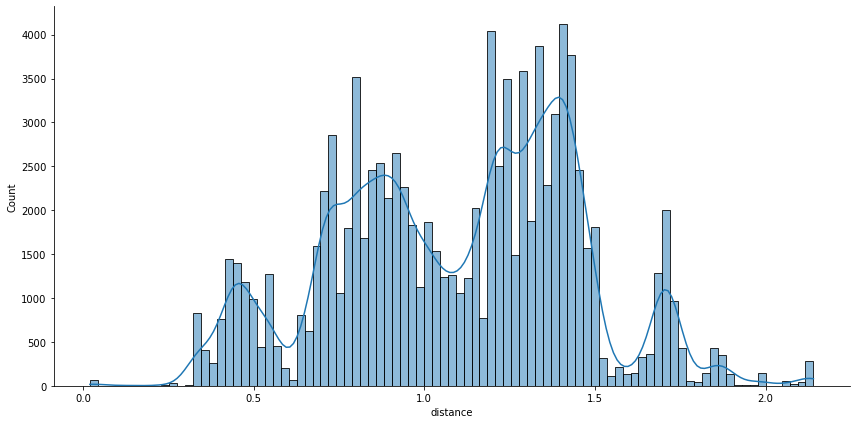

In [232]:
# Distance

sns.displot(x = 'distance', data = xtrain, aspect = 2, height = 6, kde = True);

### Test

In [233]:
xtest = test.copy()

In [234]:
test.describe()

,index,time_stamp,distance,surge_multiplier
count,25000.000000,2.500000e+04,25000.000000,25000.000000
mean,12499.500000,1.543401e+12,2.177710,1.015840
std,7217.022701,1.318553e+07,1.120426,0.098815
min,0.000000,1.543364e+12,0.020000,1.000000
25%,6249.750000,1.543399e+12,1.280000,1.000000
50%,12499.500000,1.543404e+12,2.140000,1.000000
75%,18749.250000,1.543409e+12,2.910000,1.000000
max,24999.000000,1.543414e+12,7.620000,3.000000


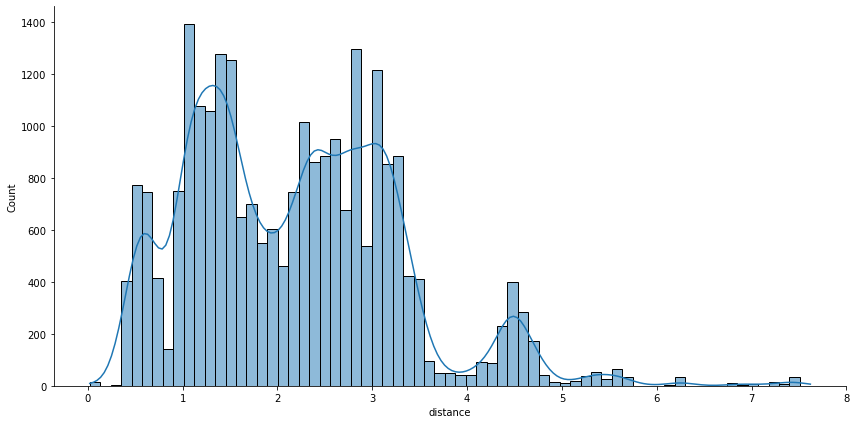

In [235]:
# Test

sns.displot(x = 'distance', data = test, aspect = 2, height = 6, kde = True);

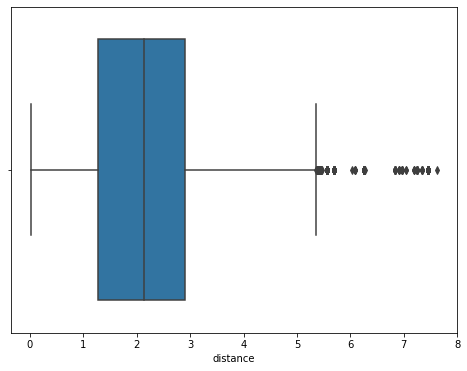

In [236]:
# Boxplot (Distance)

plt.figure(figsize = (8,6))
sns.boxplot(x = 'distance', data = test);

In [237]:
# Removing postitive skewness

xtest['distance'] = np.log1p(xtest['distance'])

In [238]:
## REmoving outliers

xtest = remove_outliers(xtest, 'distance')

In [239]:
xtest.describe()

,index,time_stamp,distance,surge_multiplier
count,25000.000000,2.500000e+04,25000.000000,25000.000000
mean,12499.500000,1.543401e+12,1.094555,1.015840
std,7217.022701,1.318553e+07,0.354210,0.098815
min,0.000000,1.543364e+12,0.019803,1.000000
25%,6249.750000,1.543399e+12,0.824175,1.000000
50%,12499.500000,1.543404e+12,1.144223,1.000000
75%,18749.250000,1.543409e+12,1.363537,1.000000
max,24999.000000,1.543414e+12,2.154085,3.000000


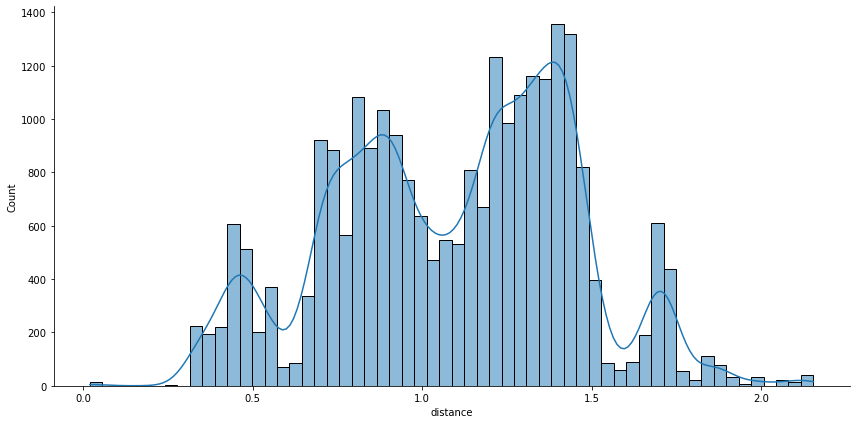

In [240]:
sns.displot(x = 'distance', data = xtest, aspect = 2, height = 6, kde = True);

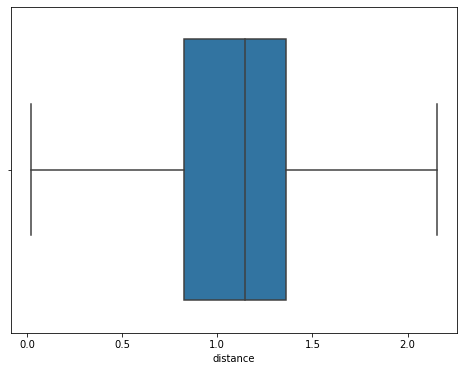

In [241]:
# Boxplot (Distance)

plt.figure(figsize = (8,6))
sns.boxplot(x = 'distance', data = xtest);

### Correlation

<ipython-input-242-7bd17d292843>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(xtrain.corr(), dtype = np.bool)


<AxesSubplot:>

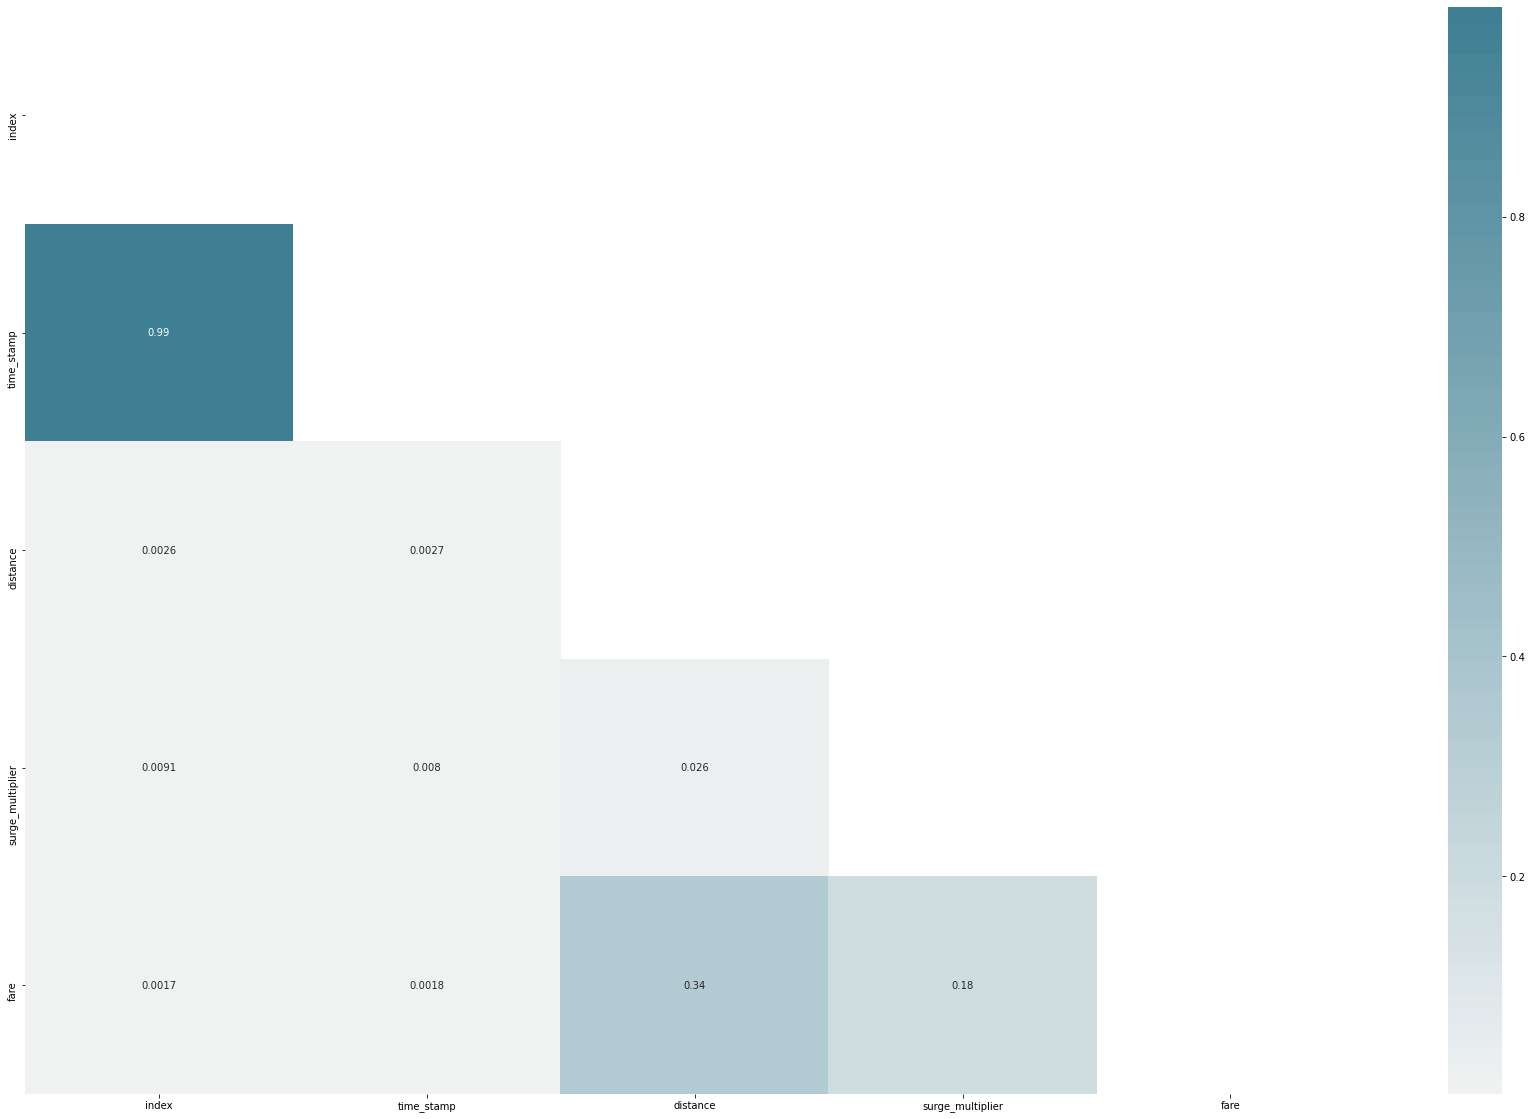

In [242]:
plt.subplots(figsize = (30,20))
mask = np.zeros_like(xtrain.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Plotting heatmap
sns.heatmap(xtrain.corr(), cmap = sns.diverging_palette(20,220, n = 200), mask = mask, annot = True, center = 0)

### Balancing Dataset

In [243]:
xxtrain = xtrain.sample(frac = 1)

In [244]:
xxtrain

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
56535,56535,1543309763304,Lyft,Beacon Hill,Boston University,1.208960,1.00,Lux,2.862201
90202,90202,1543351883982,Lyft,Haymarket Square,Theatre District,0.806476,1.00,Lux Black,2.862201
93641,93641,1543356203089,Lyft,Financial District,North End,0.815365,1.75,Lux Black XL,3.881564
47112,47112,1543298061853,Uber,Northeastern University,North Station,1.255616,1.00,Black,3.178054
62295,62295,1543316963829,Uber,Northeastern University,North Station,1.439835,1.00,Black SUV,3.481240
...,...,...,...,...,...,...,...,...,...
58568,58568,1543312283673,Uber,Fenway,West End,1.313724,1.00,UberXL,2.833213
49409,49409,1543300941840,Uber,West End,South Station,1.144223,1.00,WAV,2.251292
50914,50914,1543302742064,Uber,Financial District,North End,0.792993,1.00,Black,2.772589
33888,33888,1543281503456,Uber,North Station,Boston University,1.388791,1.00,UberX,2.442347


In [245]:
xxtrain['surge_multiplier'].value_counts()

1.00    96753
1.25     1715
1.50      764
1.75      403
2.00      335
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

In [246]:
xfilter = xxtrain[xxtrain['surge_multiplier'] == 1.00][:15000]

In [247]:
xxtrain = xxtrain[xxtrain['surge_multiplier'] != 1.00]

In [248]:
xxtrain['surge_multiplier'].value_counts()

1.25    1715
1.50     764
1.75     403
2.00     335
2.50      23
3.00       5
Name: surge_multiplier, dtype: int64

In [249]:
xxtrain = pd.concat([xxtrain, xfilter])

In [250]:
xxtrain['surge_multiplier'].value_counts()

1.00    15000
1.25     1715
1.50      764
1.75      403
2.00      335
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

In [251]:
xtest['surge_multiplier'].value_counts()

1.00    24141
1.25      453
1.50      210
1.75       97
2.00       89
2.50        8
3.00        2
Name: surge_multiplier, dtype: int64

### Extracting Time from TimeStamp

In [252]:
xxtrain['date_time'] = pd.to_datetime(xxtrain['time_stamp'] / 1000, unit = 's')

In [253]:
xxtrain['date_time'].value_counts()

2018-11-26 22:14:10.151000064    21
2018-11-26 13:41:10.388999936    12
2018-11-26 16:11:10.078000128    10
2018-11-26 05:14:01.977999872     8
2018-11-26 22:11:10.437999872     8
                                 ..
2018-11-27 06:36:22.687000064     1
2018-11-26 11:02:10.278000128     1
2018-11-27 05:21:23.486000128     1
2018-11-26 20:47:09.776999936     1
2018-11-26 06:26:01.943000064     1
Name: date_time, Length: 11040, dtype: int64

In [254]:
xxtrain['hour'] = xxtrain['date_time'].dt.hour
xxtrain['minutes'] = xxtrain['date_time'].dt.minute

In [255]:
# Test Dataset

In [256]:
xxtest = xtest.copy()

In [257]:
xxtest['date_time'] = pd.to_datetime(xxtest['time_stamp'] / 1000, unit = 's')

In [258]:
xxtest['hour'] = xxtest['date_time'].dt.hour
xxtest['minutes'] = xxtest['date_time'].dt.minute

In [259]:
# Removing 


xxtrain.drop('index', inplace = True, axis = 1)
xxtrain.drop('time_stamp', inplace = True, axis =1 )
xxtrain.drop('date_time', inplace = True, axis = 1)

In [260]:
# Removing

xxtest.drop('index', inplace = True, axis =1)
xxtest.drop('time_stamp', inplace = True, axis = 1)
xxtest.drop('date_time', inplace = True, axis = 1)

### Removing Skewness


In [261]:
from scipy.stats import skew

In [262]:
# Remvoing skewness from (Training dataset)

df_all_num = xxtrain.select_dtypes(include = ['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending = False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew': high_skew})
skew_features

surge_multiplier    3.144947
minutes             0.015835
fare                0.014580
distance           -0.120061
hour               -0.148377
dtype: float64

In [263]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

In [264]:
# Removing

for i in skew_index:
    xxtrain[i] = boxcox1p(xxtrain[i], boxcox_normmax(xxtrain[i] + 1.002))

In [265]:
df_all_num = xxtrain.select_dtypes(include = ['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending = False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew': high_skew})
skew_features

surge_multiplier    1.975501
minutes             0.015835
fare                0.014580
distance           -0.120061
hour               -0.148377
dtype: float64

### Removing Skewness (Test set)

In [267]:
df_all_num = xxtest.select_dtypes(include = ['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending = False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew': high_skew})
skew_features

surge_multiplier    8.065760
distance           -0.111603
minutes            -0.212184
hour               -1.848065
dtype: float64

In [268]:
# Removing 

for i in skew_index:
    xxtest[i] = boxcox1p(xxtest[i], boxcox_normmax(xxtest[i] + 1.002))

In [269]:
df_all_num = xxtest.select_dtypes(include = ['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending = False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew': high_skew})
skew_features

surge_multiplier    5.282941
distance           -0.111603
minutes            -0.212184
hour               -1.848065
dtype: float64

### Features Transformation

Dummy variable

In [273]:
xxtrain = pd.get_dummies(xxtrain)
xxtest = pd.get_dummies(xxtest)

In [274]:
xxtrain

,distance,surge_multiplier,fare,hour,minutes,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
93641,0.815365,0.172382,3.881564,22,3,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
80544,1.378766,0.172579,3.663562,17,30,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
91567,1.124930,0.172382,3.157000,21,21,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
86053,1.843719,0.171293,3.839452,19,27,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
52369,1.386294,0.172756,3.676301,7,42,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28424,2.135349,0.169743,2.970414,23,45,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
88954,1.396245,0.169743,3.555348,20,27,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
99309,1.297463,0.169743,2.251292,0,3,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
82732,1.743969,0.169743,3.511545,18,18,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [275]:
xxtest.shape, xxtrain.shape

((25000, 42), (18245, 43))

In [276]:
X = xxtrain.drop('fare', axis = 1)
y = xxtrain['fare']

In [277]:
X.shape, xxtest.shape

((18245, 42), (25000, 42))

### Redundant Feature

In [279]:
def redundant_features(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99.94:
            redundant.append(i)
    
    redundant = list(redundant)
    return redundant


redundant_features = redundant_features(X)

X = X.drop(redundant_features, axis = 1)

In [280]:
X.shape

(18245, 42)

### Cross Validation

In [292]:
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import r2_score


In [284]:
kfold = KFold(n_splits = 11, random_state = 42, shuffle = True)

In [321]:
## Error function to compute error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                    scoring="neg_mean_squared_error", 
                                    cv=kfold))
    return (rmse)

In [322]:
# Splitting data

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Models

In [325]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,RobustScaler

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor,XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor

## Ridge (L2 regularization)

In [326]:
ridge= Ridge()
params= {'alpha': [5,8,10,10.1,10.2,10.3,10.35,10.36,11,12,15]}
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
grid_ridge=GridSearchCV(ridge, param_grid=params,
                        cv=kfold,
                       scoring='neg_mean_squared_error')
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=11, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [5, 8, 10, 10.1, 10.2, 10.3, 10.35, 10.36, 11,
                                   12, 15]},
             scoring='neg_mean_squared_error')

In [327]:
alpha = grid_ridge.best_params_
ridge_score = grid_ridge.best_score_
print("The best alpha value found is:",alpha['alpha'],'with score:',ridge_score)

ridge_alpha=Ridge(alpha=alpha['alpha'])
ridge_alpha.fit(X_train,y_train)
y_pred_train=ridge_alpha.predict(X_train)
y_pred_test=ridge_alpha.predict(X_test)

print('RMSE train = ',rmsle(y_train,y_pred_train))
print('RMSE test = ',rmsle(y_test,y_pred_test))

The best alpha value found is: 5 with score: -0.02972818666879081
RMSE train =  0.17193996330544045
RMSE test =  0.17178925627354422


In [328]:
scores={}
alphas_ridge = [15, 15.1, 15.2, 15.3, 15.4, 15.5] #Best value of alpha parmaters for Ridge regression
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_ridge, cv=kfold))

score = cv_rmse(ridge)
print(score)
print("ridge RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

[0.1758723  0.17069739 0.16886067 0.16939454 0.1692964  0.17878538
 0.18386448 0.17758092 0.17128782 0.16577056 0.1624431 ]
ridge RMSE: 0.1722 (0.0059)


### Lasso (L1 Regularization)

In [329]:
alphas_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008] #Best value of alpha parmaters for lasso
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alphas_lasso, cv=kfold))
score = cv_rmse(lasso)
print(score)
print("lasso RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std())

[0.17594551 0.17053752 0.16885747 0.16940236 0.16926531 0.17858273
 0.18392262 0.17756263 0.17126726 0.16567355 0.16239522]
lasso RMSE: 0.1721 (0.0060)


### Elastic Net Regression

In [330]:
alpha_elnet= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l1ratio_elnet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1000000, alphas=alpha_elnet, \
                                                        cv=kfold, l1_ratio=l1ratio_elnet))
score=cv_rmse(elasticnet)
print(score)
print("Elasticnet RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['elasticnet'] = (score.mean(), score.std())

[0.17590445 0.17048746 0.16880504 0.1693633  0.16921703 0.17855388
 0.18390598 0.17752191 0.17120446 0.16561936 0.16235147]
Elasticnet RMSE: 0.1721 (0.0060)


### Support Vector Regressor (SVR)

In [331]:
svr = make_pipeline(RobustScaler(), SVR(C= 19, epsilon= 0.008, gamma=0.00015))
score=cv_rmse(svr)
print(score)
print("SVR RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

[0.18026161 0.1783896  0.17383203 0.17378737 0.17619615 0.1856729
 0.18952198 0.18606524 0.17769897 0.17052832 0.1671547 ]
SVR RMSE: 0.1781 (0.0066)


### Gradient Boosting Regressor

In [332]:
gbr= GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,max_depth=3,\
                              min_samples_leaf=15,max_features='sqrt',min_samples_split=10,loss='huber',\
                              random_state=42)
score=cv_rmse(gbr)
print(score)
print("GBR RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

[0.11616348 0.1028699  0.1002268  0.11050632 0.10527966 0.11454988
 0.11399516 0.10785051 0.11099576 0.1081117  0.09648018]
GBR RMSE: 0.1079 (0.0059)


### LGBM Regressor

In [333]:
lgbm =  LGBMRegressor(objective='regression', num_leaves=4,learning_rate=0.01, n_estimators=6000,
                                       max_bin=200, bagging_fraction=0.75,bagging_freq=5, bagging_seed=7,
                                       feature_fraction=0.2,feature_fraction_seed=7,verbose=-1)
score=cv_rmse(lgbm)
print(score)
print("LGBM RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgbm'] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

### XGBoost Regressor

In [334]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7,
                                     colsample_bytree=0.7, objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27, reg_alpha=0.00006)
score=cv_rmse(xgb)
print(score)
print("XGBOOST RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[0.11498787 0.10144748 0.099644   0.11007124 0.10410144 0.11247535
 0.11242381 0.10681635 0.10981324 0.10793224 0.09632165]
XGBOOST RMSE: 0.1069 (0.0056)


### Bagging Regressor

In [335]:
etr = ExtraTreesRegressor(n_estimators=60,random_state=42)
score=cv_rmse(etr)
print(score)
print("XGBOOST RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['etr'] = (score.mean(), score.std())

[0.12518284 0.11227871 0.11249712 0.12481292 0.11999014 0.12251102
 0.11910857 0.12150896 0.12283105 0.11941803 0.10812884]
XGBOOST RMSE: 0.1189 (0.0053)


### Stacking Regressor

In [336]:
stack_reg = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgb, lgbm),
                                meta_regressor=xgb,
                                use_features_in_secondary=True)

### Fitting Models on Train Set

In [337]:
lasso_final= lasso.fit(X,y)


In [338]:
ridge_final=ridge.fit(X,y)


In [339]:
elasticnet_final=elasticnet.fit(X,y)


In [340]:
svr_final=svr.fit(X,y)


In [341]:
gbr_final=gbr.fit(X,y)


In [342]:
lgbm_final=lgbm.fit(X,y)


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [343]:
xgb_final=xgb.fit(X,y)


In [344]:
stack_reg_final=stack_reg.fit(X,y)


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

### Blending

In [345]:
def blend_models_predict(X):
    return ((0.025* elasticnet_final.predict(X)) + \
            (0.025 * lasso_final.predict(X)) + \
            (0.025 * ridge_final.predict(X)) + \
            (0.025* svr_final.predict(X)) + \
            (0.62 * gbr_final.predict(X)) + \
            (0.03 * xgb_final.predict(X)) + \
            (0.03 * lgbm_final.predict(X)) + \
            (0.22 * stack_reg_final.predict(np.array(X))))

In [346]:
print('RMSLE score on train data:')
blended_score=rmsle(y, blend_models_predict(X))
print(blended_score)
scores['blended'] = (blended_score, 0)

RMSLE score on train data:
0.10493178787705719


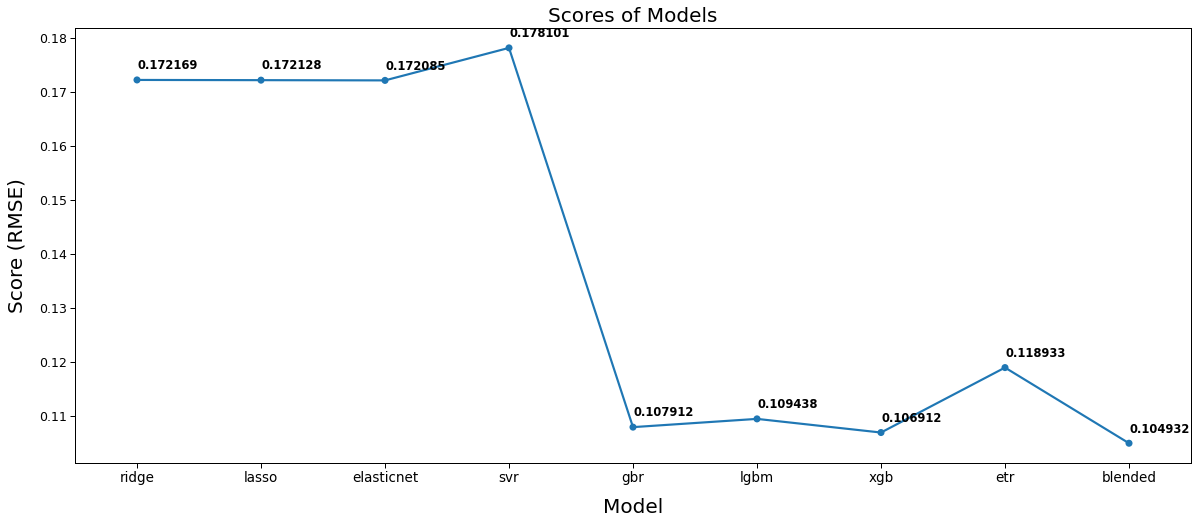

In [347]:
# Plot the predictions for each model
#sns.set_style("white")
fig = plt.figure(figsize=(20, 8))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()